## Machine Learning Libraries
### 1. Scikit-learn
### 2. TensorFlow
### 3. Keras

In [1]:
%pip install scikit-learn
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#### Making DataSet on own for test purposes
Using the `.reshape(-1,1)` we make sure array in vertical form for us to use `sklearn`

In [4]:
testscores = np.array([18, 20, 24, 26, 28, 30, 31, 40, 42,56]).reshape(-1,1)
time_studied = np.array([45, 56, 60, 65, 70, 80, 60, 80, 90, 94]).reshape(-1,1)
print(time_studied)

[[45]
 [56]
 [60]
 [65]
 [70]
 [80]
 [60]
 [80]
 [90]
 [94]]


#### Declaring the Model

In [5]:
model = LinearRegression()
model.fit(time_studied, testscores)


LinearRegression()

### Visualising with MatplotLib

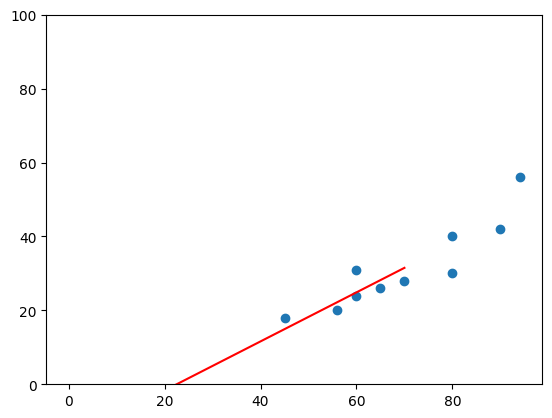

[[22.21287129]]


In [6]:
plt.scatter(time_studied, testscores)
plt.plot(np.linspace(0,70,100).reshape(-1,1), model.predict(np.linspace(0,70,100).reshape(-1,1)), 'r')
plt.ylim(0,100)
plt.show()
print(model.predict(np.array(56).reshape(-1,1)))

#### Using the `train_test_split` method to split the scores and time studied
So here I learnt that the model might actually give out some random negative scores when asked for the test data, so to avoid this we can set the test_size to 30% for optimal results especially when the data is small.

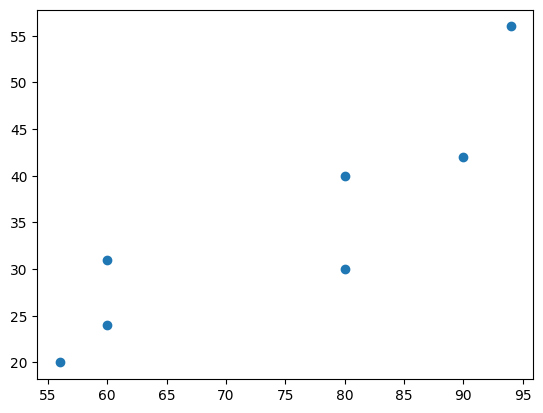

0.4061321245585905


In [7]:
time_train, time_test, score_train, score_test = train_test_split(time_studied, testscores, test_size=0.3)

model.fit(time_train, score_train)

plt.scatter(time_train, score_train)
plt.show()

print(model.score(time_test, score_test))

### K nearest Neighbours
#### Using the `KNeighborsClassifier` method to predict the scores

In [8]:
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [9]:
data = load_breast_cancer()
print(data.feature_names)
print(data.target_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']


#### Spliting the data into 2 parts, the training and the testing data

In [10]:
x_train, x_test, y_train, y_test = train_test_split(np.array(data.data), np.array(data.target), test_size=0.3)

clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(x_train, y_train)
print(clf.score(x_test, y_test))

new_data = np.array([[10.2, 18.5, 95.2, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7]])  # 30 features
prediction = clf.predict(new_data)
prediction_proba = clf.predict_proba(new_data)
print("Predicted class:", prediction)
print("Prediction probabilities:", prediction_proba)

0.9181286549707602
Predicted class: [1]
Prediction probabilities: [[0. 1.]]


### Support Vector Machine
##### Importing required modules

In [11]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [16]:
data = load_breast_cancer()

x = data.data
y = data.target

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

clf = SVC(kernel='linear', C= 5)

clf.fit(x_train, y_train)

clf2 = KNeighborsClassifier(n_neighbors=3)
clf2.fit(x_train,y_train)

print(f'SVC: {clf.score(x_test, y_test)}')
print(f'KNN: {clf2.score(x_test,y_test)}')


SVC: 0.956140350877193
KNN: 0.9035087719298246


### Decision Tree and Random Forest Classifier
#### Importing required modules

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

##### Using the `DecisionTreeClassifier` and `RandomForestClassifier` method to predict the scores

In [23]:
clf3 = DecisionTreeClassifier()
clf3.fit(x_train,y_train)

clf4 = RandomForestClassifier()
clf4.fit(x_train,y_train)

print(f'Decision Tree Classifier: {clf3.score(x_test,y_test)}')
print(f'Random Forest Classifier: {clf4.score(x_test,y_test)}')

Decision Tree Classifier: 0.9122807017543859
Random Forest Classifier: 0.956140350877193
